In [1]:
# Fetching necessary imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Reading and storing the data in a dataframe
filename = 'police.csv'
df = pd.read_csv(filename, index_col = False)
df.head()

/Users/anirudh/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,17,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN


In [3]:
# Exploring the dataframe - 
# Printing the columns
# Printing the shape
# Printing the count of Nan in each column
print(df.columns, '\n')
print(df.shape, "\n")
print(df.isna().sum(), '\n')

Index(['raw_row_number', 'date', 'time', 'zone', 'subject_race', 'subject_sex',
       'department_id', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'contraband_other',
       'frisk_performed', 'search_conducted', 'search_basis',
       'reason_for_search', 'reason_for_stop', 'vehicle_make', 'vehicle_model',
       'raw_BasisForStop', 'raw_OperatorRace', 'raw_OperatorSex',
       'raw_ResultOfStop', 'raw_SearchResultOne', 'raw_SearchResultTwo',
       'raw_SearchResultThree'],
      dtype='object') 

(509681, 31) 

raw_row_number                0
date                         10
time                         10
zone                         10
subject_race              29073
subject_sex               29097
department_id                10
type                          0
arrest_made               29073
citation_issued           29073
warning_issued            29073
ou

In [4]:
# Creating trafficStops dataframe with the required columns
cols = ['date', 'time', 'zone', 'subject_race', 'subject_sex', 'type',
        'department_id', 'frisk_performed', 'search_conducted',
        'outcome', 'reason_for_stop', 'reason_for_search']
trafficStops = df[cols].dropna()
trafficStops['zone'] = trafficStops['zone'].astype('category')

# Concatenating date and time into one column - dateTime
# Converting dateTime to datetime type and setting it as index 
dateTime = trafficStops['date'].str.cat(trafficStops['time'], " ")
trafficStops.drop('time', axis = 'columns', inplace = True)
trafficStops['dateTime'] = pd.to_datetime(dateTime)
trafficStops.set_index('dateTime', inplace = True)
trafficStops.sort_index(inplace = True)

# Printing the shape of the newly created trafficStops dataframe along with the dataframe
print(trafficStops.shape, '\n')
trafficStops.head()

(17331, 11) 



,date,zone,subject_race,subject_sex,type,department_id,frisk_performed,search_conducted,outcome,reason_for_stop,reason_for_search
dateTime,,,,,,,,,,,
2005-01-24 20:32:00,2005-01-24,K1,white,male,vehicular,600,False,True,citation,Speeding,Probable Cause
2005-02-09 03:05:00,2005-02-09,X4,white,male,vehicular,500,True,True,citation,Registration Violation,Probable Cause|Terry Frisk
2005-08-28 01:00:00,2005-08-28,X1,white,male,vehicular,000,True,True,arrest,Other Traffic Violation,Incident to Arrest|Terry Frisk
2005-09-15 02:20:00,2005-09-15,X4,white,male,vehicular,500,False,True,arrest,Other Traffic Violation,Incident to Arrest
2005-09-24 02:20:00,2005-09-24,K3,white,male,vehicular,300,True,True,arrest,Other Traffic Violation,Incident to Arrest


In [5]:
# Checking and changing the datatype of the columns in the dataframe to a more appropriate type 
print(trafficStops.dtypes, '\n')

trafficStops['subject_race'] = trafficStops['subject_race'].astype('category')
trafficStops['subject_sex'] = trafficStops['subject_sex'].astype('category')
trafficStops['department_id'] = trafficStops['department_id'].astype('int')
trafficStops['frisk_performed'] = trafficStops['frisk_performed'].astype('bool')
trafficStops['outcome'] = trafficStops['outcome'].astype('category')

print('--------- Changing data types -----------\n')
print(trafficStops.dtypes, '\n')

date                   object
zone                 category
subject_race           object
subject_sex            object
type                   object
department_id          object
frisk_performed        object
search_conducted         bool
outcome                object
reason_for_stop        object
reason_for_search      object
dtype: object 

--------- Changing data types -----------

date                   object
zone                 category
subject_race         category
subject_sex          category
type                   object
department_id           int64
frisk_performed          bool
search_conducted         bool
outcome              category
reason_for_stop        object
reason_for_search      object
dtype: object 



In [6]:
# Checking the shape of the dataframe to investigate for redundant columns
# Removing redundant columns - type and search_conducted
print('Initial shape of the dataframe: ', trafficStops.shape, "\n")
print(trafficStops['type'].value_counts(), '\n')
print(trafficStops['search_conducted'].value_counts(), '\n')
trafficStops.drop(['type', 'search_conducted'], axis = 'columns', inplace = True)
print('Shape of the dataframe after removing redundant columns: ', trafficStops.shape, "\n")
trafficStops.head(10)

# This final dataframe looks clean and reasonable to perform further analysis. 

Initial shape of the dataframe:  (17331, 11) 

vehicular    17331
Name: type, dtype: int64 

True    17331
Name: search_conducted, dtype: int64 

Shape of the dataframe after removing redundant columns:  (17331, 9) 



,date,zone,subject_race,subject_sex,department_id,frisk_performed,outcome,reason_for_stop,reason_for_search
dateTime,,,,,,,,,
2005-01-24 20:32:00,2005-01-24,K1,white,male,600,False,citation,Speeding,Probable Cause
2005-02-09 03:05:00,2005-02-09,X4,white,male,500,True,citation,Registration Violation,Probable Cause|Terry Frisk
2005-08-28 01:00:00,2005-08-28,X1,white,male,0,True,arrest,Other Traffic Violation,Incident to Arrest|Terry Frisk
2005-09-15 02:20:00,2005-09-15,X4,white,male,500,False,arrest,Other Traffic Violation,Incident to Arrest
2005-09-24 02:20:00,2005-09-24,K3,white,male,300,True,arrest,Other Traffic Violation,Incident to Arrest
2005-10-01 00:00:00,2005-10-01,K1,white,male,600,True,citation,Equipment/Inspection Violation,Odor of Drugs/Alcohol|Probable Cause
2005-10-01 00:00:00,2005-10-01,K1,white,male,600,True,citation,Speeding,Odor of Drugs/Alcohol|Probable Cause
2005-10-01 00:00:00,2005-10-01,K3,white,male,300,True,arrest,Equipment/Inspection Violation,Probable Cause
2005-10-01 16:20:00,2005-10-01,K1,white,male,600,True,citation,Speeding,Terry Frisk|Reasonable Suspicion


In [7]:
# Filtering data on the basis of driver race
print(trafficStops['subject_race'].value_counts(), '\n')
print('-------- Calculating proportion of each race --------\n')
print(trafficStops['subject_race'].value_counts(normalize = True))

white                     9753
black                     4195
hispanic                  3096
asian/pacific islander     272
other                       15
Name: subject_race, dtype: int64 

-------- Calculating proportion of each race --------

white                     0.562749
black                     0.242052
hispanic                  0.178639
asian/pacific islander    0.015694
other                     0.000866
Name: subject_race, dtype: float64


In [8]:
# Filtering data on the basis of outcome
print(trafficStops['outcome'].value_counts(), '\n')
print('-------- Calculating proportion of each outcome --------\n')
print(trafficStops['outcome'].value_counts(normalize = True))

citation    10513
arrest       6187
warning       631
Name: outcome, dtype: int64 

-------- Calculating proportion of each outcome --------

citation    0.606601
arrest      0.356990
warning     0.036409
Name: outcome, dtype: float64


In [9]:
# Calculating number and proportion of outcome for whites in the dataframe
print('------- Calculating number and proportion of outcome for whites --------')
white = trafficStops[trafficStops['subject_race'] == 'white']
print(white['outcome'].value_counts(), '\n')
print(white['outcome'].value_counts(normalize = True), '\n')

# Calculating number and proportion of outcome for blacks in the dataframe
print('------- Calculating number and proportion of outcome for blacks --------')
black = trafficStops[trafficStops['subject_race'] == 'black']
print(black['outcome'].value_counts(), '\n')
print(black['outcome'].value_counts(normalize = True), '\n')

# Calculating number and proportion of outcome for hispanics in the dataframe
print('------- Calculating number and proportion of outcome for hispanics --------')
hispanic = trafficStops[trafficStops['subject_race'] == 'hispanic']
print(hispanic['outcome'].value_counts(), '\n')
print(hispanic['outcome'].value_counts(normalize = True), '\n')

# Calculating number and proportion of outcome for asians in the dataframe
print('------- Calculating number and proportion of outcome for asians --------')
asian = trafficStops[trafficStops['subject_race'] == 'asian/pacific islander']
print(asian['outcome'].value_counts(), '\n')
print(asian['outcome'].value_counts(normalize = True), '\n')

------- Calculating number and proportion of outcome for whites --------
citation    5918
arrest      3507
warning      328
Name: outcome, dtype: int64 

citation    0.606788
arrest      0.359582
warning     0.033631
Name: outcome, dtype: float64 

------- Calculating number and proportion of outcome for blacks --------
citation    2492
arrest      1535
warning      168
Name: outcome, dtype: int64 

citation    0.594041
arrest      0.365912
warning     0.040048
Name: outcome, dtype: float64 

------- Calculating number and proportion of outcome for hispanics --------
citation    1934
arrest      1035
warning      127
Name: outcome, dtype: int64 

citation    0.624677
arrest      0.334302
warning     0.041021
Name: outcome, dtype: float64 

------- Calculating number and proportion of outcome for asians --------
citation    158
arrest      106
warning       8
Name: outcome, dtype: int64 

citation    0.580882
arrest      0.389706
warning     0.029412
Name: outcome, dtype: float64 



In [10]:
# Calculating number and proportion of outcome for males in the dataframe
print('------- Calculating number and proportion of outcome for males --------')
male = trafficStops[trafficStops['subject_sex'] == 'male']
print(male['outcome'].value_counts(), '\n')
print(male['outcome'].value_counts(normalize = True), '\n')

# Calculating number and proportion of outcome for females in the dataframe
print('------- Calculating number and proportion of outcome for females --------')
female = trafficStops[trafficStops['subject_sex'] == 'female']
print(female['outcome'].value_counts(), '\n')
print(female['outcome'].value_counts(normalize = True), '\n')

------- Calculating number and proportion of outcome for males --------
citation    9094
arrest      5277
warning      562
Name: outcome, dtype: int64 

citation    0.608987
arrest      0.353378
warning     0.037635
Name: outcome, dtype: float64 

------- Calculating number and proportion of outcome for females --------
citation    1419
arrest       910
warning       69
Name: outcome, dtype: int64 

citation    0.591743
arrest      0.379483
warning     0.028774
Name: outcome, dtype: float64 



In [11]:
# Calculating number and proportion of females stopped for commiting violations
print('-------- Calculating number and proportion of females stopped for commiting violations --------\n')
print(female['reason_for_stop'].value_counts(), '\n')
print(female['reason_for_stop'].value_counts(normalize = True), '\n')
print('-------- Calculating number and proportion of males stopped for commiting violations --------\n')
print(male['reason_for_stop'].value_counts(), '\n')
print(male['reason_for_stop'].value_counts(normalize = True))

-------- Calculating number and proportion of females stopped for commiting violations --------

Other Traffic Violation             666
Speeding                            664
Equipment/Inspection Violation      537
Registration Violation              302
Call for Service                     98
Seatbelt Violation                   63
APB                                  17
Violation of City/Town Ordinance     13
Special Detail/Directed Patrol       12
Suspicious Person                    12
Motorist Assist/Courtesy             10
Warrant                               4
Name: reason_for_stop, dtype: int64 

Other Traffic Violation             0.277731
Speeding                            0.276897
Equipment/Inspection Violation      0.223937
Registration Violation              0.125938
Call for Service                    0.040867
Seatbelt Violation                  0.026272
APB                                 0.007089
Violation of City/Town Ordinance    0.005421
Special Detail/Directed P

In [12]:
# Computing whether gender affects who gets a ticket for speeding
print('--------- Calculating the proportion of female drivers charged for speeding ----------')
female_speeding = female[female['reason_for_stop'] == 'Speeding']
print(female_speeding['outcome'].value_counts(normalize = True), '\n')
print('--------- Calculating the proportion of male drivers charged for speeding ----------')
male_speeding = male[male['reason_for_stop'] == 'Speeding']
print(male_speeding['outcome'].value_counts(normalize = True))

# As per the data collected, it is evident that gender does not affect who gets a ticket for speeding, as 
# the difference in proportion of female and male drivers is almost the same. (70% and 68% respectively)

--------- Calculating the proportion of female drivers charged for speeding ----------
citation    0.700301
arrest      0.284639
warning     0.015060
Name: outcome, dtype: float64 

--------- Calculating the proportion of male drivers charged for speeding ----------
citation    0.677466
arrest      0.299896
warning     0.022638
Name: outcome, dtype: float64


In [13]:
# Computing whether gender affects who is frisked during the search
print('--------- Calculating proportion of females frisked during the search ---------')
print(female['frisk_performed'].mean(), '\n')
print('--------- Calculating proportion of males frisked during the search ---------')
print(male['frisk_performed'].mean(), '\n')

# As per the data collected, it is evident that males were frisked more 
# than females during the search (54% and 43% respectively)

--------- Calculating proportion of females frisked during the search ---------
0.4341117597998332 

--------- Calculating proportion of males frisked during the search ---------
0.5357932096698587 



In [14]:
# Calculating the number of arrests and arrest rate for each zone grouped by gender
isArrest = trafficStops['outcome'] == 'arrest'
trafficStops['is_arrest'] = isArrest
trafficStops.groupby(['subject_sex', 'zone']).agg({'is_arrest': ['sum', 'mean']})

# As per the data collected, zones X1(57%) and X3(41%) have higher arrest rate with a count of 8 and 780
# as compared to other zones for females and males respectively. However, the number of arrests are higher
# in zone X4 for both females(339) and males(2019) with an arrest rate of 44% and 37% respectively.

is_arrest          
                       sum      mean
subject_sex zone                    
female      K1          92  0.420091
            K2         101  0.279778
            K3         208  0.302326
            X1           8  0.571429
            X3         162  0.469565
            X4         339  0.439689
male        K1         443  0.361043
            K2         682  0.314286
            K3        1302  0.316403
            X1          51  0.375000
            X3         780  0.413574
            X4        2019  0.373958

In [15]:
# Calculating the proportion of males and females searched for drugs 
print('-------- Calculating the proportion of males and females searched for drugs ----------\n')
trafficStops['drugs_suspected'] = trafficStops['reason_for_search'].str.contains('Odor of Drugs')
print(trafficStops.groupby('subject_sex').agg({'drugs_suspected' : 'mean'}), '\n')

# Calculating the proportion of males and females searched for probable cause
print('-------- Calculating the proportion of males and females searched for probable cause ----------\n')
trafficStops['probable_cause_issued'] = trafficStops['reason_for_search'].str.contains('Probable Cause')
print(trafficStops.groupby('subject_sex').agg({'probable_cause_issued' : 'mean'}))

# As per the data collected, approximately 3% more males were searched for 
# drugs and probable cause as compared to females

-------- Calculating the proportion of males and females searched for drugs ----------

             drugs_suspected
subject_sex                 
female              0.159299
male                0.187437 

-------- Calculating the proportion of males and females searched for probable cause ----------

             probable_cause_issued
subject_sex                       
female                    0.162219
male                      0.193665


In [16]:
# Calculating the number and proportion of arrests by driver's race

trafficStops.groupby('subject_race').agg({'is_arrest': ['sum', 'mean']})

# From the data provided, it is evident that asians/pacific islanders 
# have higher arrest rate as compared to other driver races. 

is_arrest          
                             sum      mean
subject_race                              
asian/pacific islander       106  0.389706
black                       1535  0.365912
hispanic                    1035  0.334302
other                          4  0.266667
white                       3507  0.359582

In [17]:
# Calculating proportion of driver's race suspected for drugs
print("------- Calculating proportion of driver's race suspected for drugs --------\n")
print(trafficStops.groupby('subject_race').agg({'drugs_suspected': 'mean'}).sort_values('drugs_suspected', ascending = False), '\n')

# Calculating proportion of driver's race suspected for probable cause
print("------- Calculating proportion of driver's race suspected for probable cause --------\n")
print(trafficStops.groupby('subject_race').agg({'probable_cause_issued': 'mean'}).sort_values('probable_cause_issued', ascending = False), '\n')

# From the data provided, it is evident that other race groups are highly suspected 
# for drugs and probable cause.

------- Calculating proportion of driver's race suspected for drugs --------

                        drugs_suspected
subject_race                           
other                          0.266667
black                          0.198331
white                          0.180355
hispanic                       0.175711
asian/pacific islander         0.154412 

------- Calculating proportion of driver's race suspected for probable cause --------

                        probable_cause_issued
subject_race                                 
other                                0.200000
black                                0.194994
white                                0.191018
hispanic                             0.178941
asian/pacific islander               0.158088 



In [18]:
# Adding additional rows to perform visualizations
isCitation = trafficStops['outcome'] == 'citation'
isWarning = trafficStops['outcome'] == 'warning'
trafficStops['month'] = trafficStops.index.month
trafficStops['year'] = trafficStops.index.year
trafficStops['is_citation'] = isCitation
trafficStops['is_warning'] = isWarning

# Setting month name rather than month number in the month column of the dataframe
dict_month = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}

trafficStops['month'] = trafficStops['month'].map(dict_month)
trafficStops.head()

,date,zone,subject_race,subject_sex,department_id,frisk_performed,outcome,reason_for_stop,reason_for_search,is_arrest,drugs_suspected,probable_cause_issued,month,year,is_citation,is_warning
dateTime,,,,,,,,,,,,,,,,
2005-01-24 20:32:00,2005-01-24,K1,white,male,600,False,citation,Speeding,Probable Cause,False,False,True,Jan,2005,True,False
2005-02-09 03:05:00,2005-02-09,X4,white,male,500,True,citation,Registration Violation,Probable Cause|Terry Frisk,False,False,True,Feb,2005,True,False
2005-08-28 01:00:00,2005-08-28,X1,white,male,0,True,arrest,Other Traffic Violation,Incident to Arrest|Terry Frisk,True,False,False,Aug,2005,False,False
2005-09-15 02:20:00,2005-09-15,X4,white,male,500,False,arrest,Other Traffic Violation,Incident to Arrest,True,False,False,Sep,2005,False,False
2005-09-24 02:20:00,2005-09-24,K3,white,male,300,True,arrest,Other Traffic Violation,Incident to Arrest,True,False,False,Sep,2005,False,False


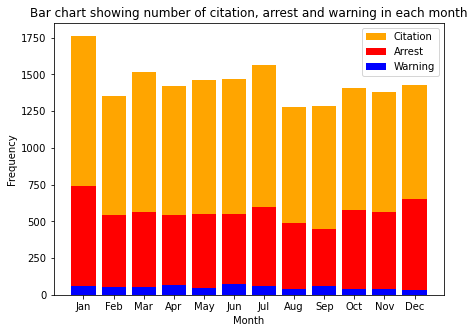

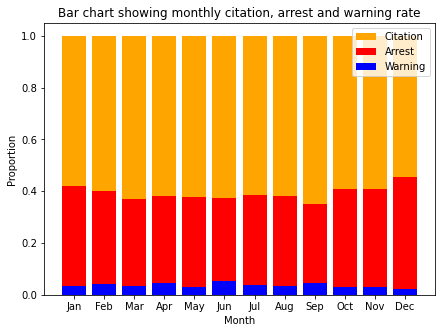

In [19]:
# Calculating the number of arrests, citations and warnings in each month
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_arrests = trafficStops.groupby('month').agg({'is_arrest':'sum'}).reindex(month)
monthly_citations = trafficStops.groupby('month').agg({'is_citation':'sum'}).reindex(month)
monthly_warnings = trafficStops.groupby('month').agg({'is_warning':'sum'}).reindex(month)

fig, ax = plt.subplots()
ax.bar(monthly_citations.index, monthly_citations['is_citation'], color = 'orange', label = 'Citation', bottom = monthly_warnings['is_warning'] + monthly_arrests['is_arrest'])
ax.bar(monthly_arrests.index, monthly_arrests['is_arrest'], color = 'red', label = 'Arrest', bottom = monthly_warnings['is_warning'])
ax.bar(monthly_warnings.index, monthly_warnings['is_warning'], color = 'blue', label = 'Warning')
ax.set_xlabel('Month')
ax.set_ylabel('Frequency')
ax.set_title('Bar chart showing number of citation, arrest and warning in each month')
ax.legend()
fig.set_size_inches([7,5])

# Calculating the proportion of arrests, citations and warnings in each month
monthly_warning_rate = trafficStops.groupby('month').agg({'is_warning':'mean'}).reindex(month)
monthly_arrest_rate = trafficStops.groupby('month').agg({'is_arrest':'mean'}).reindex(month)
monthly_citation_rate = trafficStops.groupby('month').agg({'is_citation':'mean'}).reindex(month)

fig1, ax1 = plt.subplots()
ax1.bar(monthly_citation_rate.index, monthly_citation_rate['is_citation'], color = 'orange', label = 'Citation', bottom = monthly_arrest_rate['is_arrest'] + monthly_warning_rate['is_warning'])
ax1.bar(monthly_arrest_rate.index, monthly_arrest_rate['is_arrest'], color = 'red', label = 'Arrest', bottom = monthly_warning_rate['is_warning'])
ax1.bar(monthly_warning_rate.index, monthly_warning_rate['is_warning'], color = 'blue', label = 'Warning')
ax1.set_xlabel('Month')
ax1.set_ylabel('Proportion')
ax1.set_title('Bar chart showing monthly citation, arrest and warning rate')
ax1.legend()
fig1.set_size_inches([7,5])

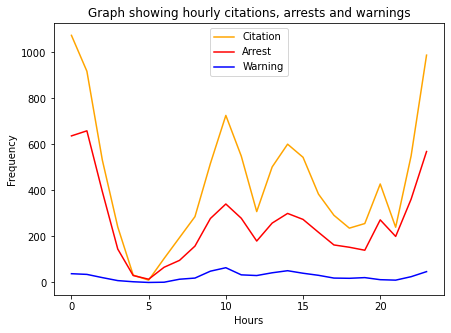

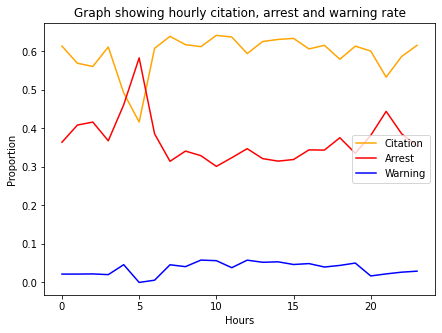

In [20]:
# Calculating the number of hourly arrests, citations and warnings
hourly_arrests = trafficStops.groupby(trafficStops.index.hour).agg({'is_arrest' : 'sum'})
hourly_citations = trafficStops.groupby(trafficStops.index.hour).agg({'is_citation' : 'sum'})
hourly_warnings = trafficStops.groupby(trafficStops.index.hour).agg({'is_warning' : 'sum'})

fig, ax = plt.subplots()
ax.plot(hourly_citations.index, hourly_citations['is_citation'], color = 'orange', label = 'Citation')
ax.plot(hourly_arrests.index, hourly_arrests['is_arrest'], color = 'red', label = 'Arrest')
ax.plot(hourly_warnings.index, hourly_warnings['is_warning'], color = 'blue', label = 'Warning')
ax.set_xlabel('Hours')
ax.set_ylabel('Frequency')
ax.set_title('Graph showing hourly citations, arrests and warnings')
ax.legend(loc = 'upper center')
fig.set_size_inches([7,5])

# Calculating the proportion of hourly arrests, citations and warnings
hourly_arrest_rate = trafficStops.groupby(trafficStops.index.hour).agg({'is_arrest' : 'mean'})
hourly_citation_rate = trafficStops.groupby(trafficStops.index.hour).agg({'is_citation' : 'mean'})
hourly_warning_rate = trafficStops.groupby(trafficStops.index.hour).agg({'is_warning' : 'mean'})

fig1, ax1 = plt.subplots()
ax1.plot(hourly_citation_rate.index, hourly_citation_rate['is_citation'], color = 'orange', label = 'Citation')
ax1.plot(hourly_arrest_rate.index, hourly_arrest_rate['is_arrest'], color = 'red', label = 'Arrest')
ax1.plot(hourly_warning_rate.index, hourly_warning_rate['is_warning'], color = 'blue', label = 'Warning')
ax1.set_xlabel('Hours')
ax1.set_ylabel('Proportion')
ax1.set_title('Graph showing hourly citation, arrest and warning rate')
ax1.legend(loc = 'center right')
fig1.set_size_inches([7,5])

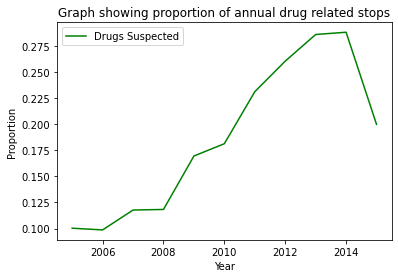

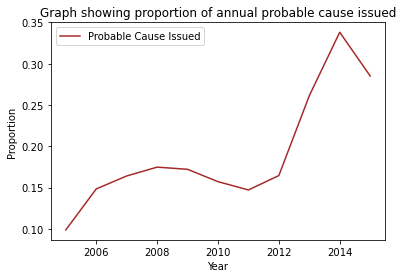

In [21]:
# Plotting proportion of annual drug related stops 
fig1, ax1 = plt.subplots()
annual_drug_stops_rate = trafficStops.groupby('year').agg({'drugs_suspected' : 'mean'})
ax1.plot(annual_drug_stops_rate.index, annual_drug_stops_rate['drugs_suspected'], color = 'green', label = 'Drugs Suspected')
ax1.set_xlabel('Year')
ax1.set_ylabel('Proportion')
ax1.set_title('Graph showing proportion of annual drug related stops')
ax1.legend()

# Plotting proportion of annual probable cause issued 
fig, ax = plt.subplots()
annual_probable_cause_issued = trafficStops.groupby('year').agg({'probable_cause_issued' : 'mean'})
ax.plot(annual_probable_cause_issued.index, annual_probable_cause_issued['probable_cause_issued'], color = 'brown', label = 'Probable Cause Issued')
ax.set_xlabel('Year')
ax.set_ylabel('Proportion')
ax.set_title('Graph showing proportion of annual probable cause issued')
ax.legend()

# The rate of annual drug related stops in congruence with the rate of probable cause issued
# nearly tripled within 10 years as the 

<AxesSubplot:title={'center':'X Zone Violations'}, xlabel='zone'>

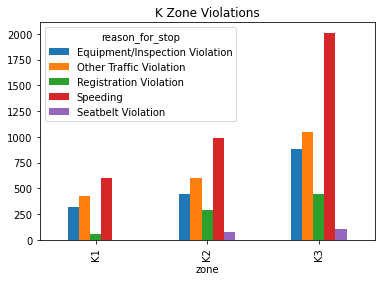

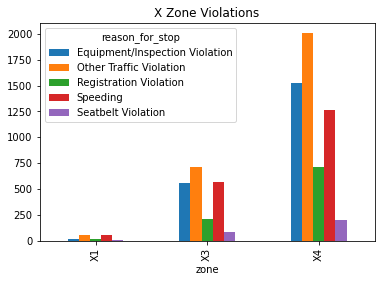

In [22]:
# Plotting graphs to show selected violations in different zones
zone_violations = pd.crosstab(trafficStops['zone'], trafficStops['reason_for_stop'])
violations = ['Equipment/Inspection Violation', 'Other Traffic Violation', 
              'Registration Violation', 'Speeding', 'Seatbelt Violation']
selected_k_zone_violations = zone_violations.loc['K1': 'K3', violations]
selected_x_zone_violations = zone_violations.loc['X1': 'X4', violations]
selected_k_zone_violations.plot(kind = 'bar', title = 'K Zone Violations')
selected_x_zone_violations.plot(kind = 'bar', title = 'X Zone Violations')

In [23]:
# Importing weather details for rhode island
filename = 'updatedWeather.csv'
weather = pd.read_csv(filename)

# Dropping junk column from the dataframe
weather.drop('Unnamed: 0', axis = 'columns', inplace = True)
weather.head()

,DATE,TAVG,TMIN,TMAX,AWND,WSF2,TDIFF,WDIFF,weatherCondition
0,2005-01-01,44.0,35,53,8.95,25.1,18,16.15,Bad
1,2005-01-02,36.0,28,44,9.40,14.1,16,4.70,Bad
2,2005-01-03,49.0,44,53,6.93,17.0,9,10.07,Bad
3,2005-01-04,42.0,39,45,6.93,16.1,6,9.17,Bad
4,2005-01-05,36.0,28,43,7.83,17.0,15,9.17,Bad


In [24]:
# Resetting the index
trafficStops.reset_index(inplace = True)
trafficStops.head()

,dateTime,date,zone,subject_race,subject_sex,department_id,frisk_performed,outcome,reason_for_stop,reason_for_search,is_arrest,drugs_suspected,probable_cause_issued,month,year,is_citation,is_warning
0,2005-01-24 20:32:00,2005-01-24,K1,white,male,600,False,citation,Speeding,Probable Cause,False,False,True,Jan,2005,True,False
1,2005-02-09 03:05:00,2005-02-09,X4,white,male,500,True,citation,Registration Violation,Probable Cause|Terry Frisk,False,False,True,Feb,2005,True,False
2,2005-08-28 01:00:00,2005-08-28,X1,white,male,0,True,arrest,Other Traffic Violation,Incident to Arrest|Terry Frisk,True,False,False,Aug,2005,False,False
3,2005-09-15 02:20:00,2005-09-15,X4,white,male,500,False,arrest,Other Traffic Violation,Incident to Arrest,True,False,False,Sep,2005,False,False
4,2005-09-24 02:20:00,2005-09-24,K3,white,male,300,True,arrest,Other Traffic Violation,Incident to Arrest,True,False,False,Sep,2005,False,False


In [25]:
# Extracting certain columns from weather dataframe and pushing them to a newly created dataframe - weatherCond
weatherCondCols = ['DATE', 'weatherCondition']
weatherCond = weather.loc[:,weatherCondCols]
weatherCond.head()

,DATE,weatherCondition
0,2005-01-01,Bad
1,2005-01-02,Bad
2,2005-01-03,Bad
3,2005-01-04,Bad
4,2005-01-05,Bad


In [26]:
# Joining the 2 dataframes - trafficStops and weatherCond - on date
trafficStopsWeather = trafficStops.merge(weatherCond, left_on = 'date', right_on = 'DATE', how = 'left')
trafficStopsWeather.drop('DATE', axis = 'columns', inplace = True)
trafficStopsWeather.set_index('dateTime', inplace = True)
trafficStopsWeather.sort_index(inplace = True)
trafficStopsWeather.head()

,date,zone,subject_race,subject_sex,department_id,frisk_performed,outcome,reason_for_stop,reason_for_search,is_arrest,drugs_suspected,probable_cause_issued,month,year,is_citation,is_warning,weatherCondition
dateTime,,,,,,,,,,,,,,,,,
2005-01-24 20:32:00,2005-01-24,K1,white,male,600,False,citation,Speeding,Probable Cause,False,False,True,Jan,2005,True,False,Good
2005-02-09 03:05:00,2005-02-09,X4,white,male,500,True,citation,Registration Violation,Probable Cause|Terry Frisk,False,False,True,Feb,2005,True,False,Bad
2005-08-28 01:00:00,2005-08-28,X1,white,male,0,True,arrest,Other Traffic Violation,Incident to Arrest|Terry Frisk,True,False,False,Aug,2005,False,False,Bad
2005-09-15 02:20:00,2005-09-15,X4,white,male,500,False,arrest,Other Traffic Violation,Incident to Arrest,True,False,False,Sep,2005,False,False,Bad
2005-09-24 02:20:00,2005-09-24,K3,white,male,300,True,arrest,Other Traffic Violation,Incident to Arrest,True,False,False,Sep,2005,False,False,Good


Text(0.5, 1.0, 'Arrest rate by weather conditions grouped by gender')

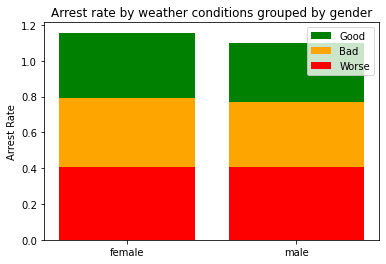

In [27]:
# Evaluating the effect of weather conditions on arrest rate of males and females
weatherCond = ['Good', 'Bad', 'Worse']
arrestRate = trafficStopsWeather.groupby(['subject_sex', 'weatherCondition']).agg({'is_arrest' : 'mean'}).reindex(weatherCond, level = 1)
unstackedArrestRate = arrestRate.unstack()

good = unstackedArrestRate['is_arrest']['Good']
bad = unstackedArrestRate['is_arrest']['Bad']
worse = unstackedArrestRate['is_arrest']['Worse']

fig, ax = plt.subplots()
ax.bar(unstackedArrestRate.index, good, label = 'Good', color = 'green', bottom = bad + worse)
ax.bar(unstackedArrestRate.index, bad, label = 'Bad', color = 'orange', bottom = worse)
ax.bar(unstackedArrestRate.index, worse, label = 'Worse', color = 'red')
ax.legend()
ax.set_ylabel('Arrest Rate')
ax.set_title('Arrest rate by weather conditions grouped by gender')

# The arrest rate increases as the weather gets worse.